In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

climlab Process of type <class 'climlab.model.column.GreyRadiationModel'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
  Tatm: (90, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.column.GreyRadiationModel'>
   LW: <class 'climlab.radiation.greygas.GreyGas'>
   SW: <class 'climlab.radiation.greygas.GreyGasSW'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>

Integrating for 365 steps, 365.2422 days, or 1 years.
Total elapsed time is 0.9993368783782377 years.


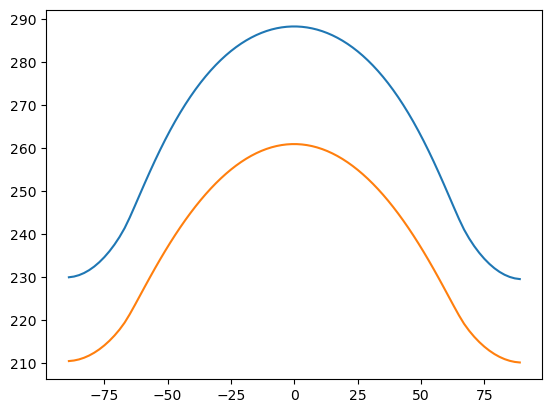

In [2]:
ebm = climlab.GreyRadiationModel(num_lev=1, num_lat=90)
insolation = climlab.radiation.AnnualMeanInsolation(domains=ebm.Ts.domain)
ebm.add_subprocess('insolation', insolation)
ebm.subprocess.SW.flux_from_space = ebm.subprocess.insolation.insolation
print(ebm)

#  add a fixed relative humidity process
#  (will only affect surface evaporation)
h2o = climlab.radiation.ManabeWaterVapor(state=ebm.state, **ebm.param)
ebm.add_subprocess('H2O', h2o)

#  Add surface heat fluxes
shf = climlab.surface.SensibleHeatFlux(state=ebm.state, Cd=3E-4)
lhf = climlab.surface.LatentHeatFlux(state=ebm.state, Cd=3E-4)
# couple water vapor to latent heat flux process
lhf.q = h2o.q
ebm.add_subprocess('SHF', shf)
ebm.add_subprocess('LHF', lhf)

ebm.integrate_years(1)

plt.plot(ebm.lat, ebm.Ts)
plt.plot(ebm.lat, ebm.Tatm)

Integrating for 1095 steps, 1095.7266 days, or 3.0 years.


Total elapsed time is 3.997347513512951 years.


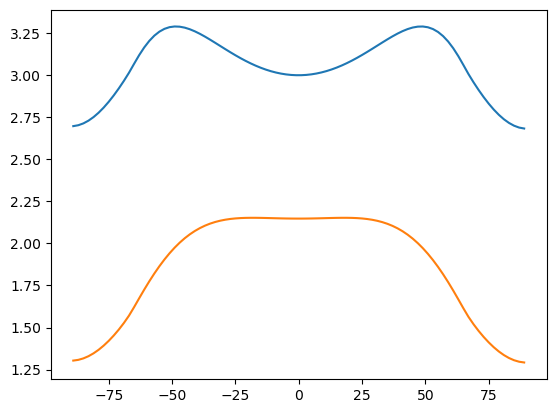

In [3]:
co2ebm = climlab.process_like(ebm)
co2ebm.subprocess['LW'].absorptivity = ebm.subprocess['LW'].absorptivity*1.1

co2ebm.integrate_years(3.)

#  no heat transport but with evaporation -- no polar amplification
plt.plot(ebm.lat, co2ebm.Ts - ebm.Ts)
plt.plot(ebm.lat, co2ebm.Tatm - ebm.Tatm)
